In [1]:
import pandas as pd
import os

os.chdir("../../")

from src import display_df
from src.feature_engineering import is_holiday

In [2]:
completed_orders = pd.read_csv("data/completed_orders.csv")
drivers_location = pd.read_csv("data/drivers_location_during_request.csv")
distance_completed_orders = pd.read_csv("data/clean/distance_completed_orders.csv")

In [23]:
df = distance_completed_orders.copy()

#### Analyze data information

In [4]:
drivers_location.head(10)

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN
6,7,392001,171651,rejected,6.613538,3.270779,NaN,NaN
7,8,392001,243906,rejected,6.591838,3.276124,NaN,NaN
8,9,392001,226949,rejected,6.610941,3.276126,NaN,NaN
9,10,392001,243769,rejected,6.617199,3.271723,NaN,NaN


In [3]:
completed_orders.head(7)

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
5,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51
6,392009,"6.6636484,3.3082058","6.6185421,3.301634",2021-07-01 06:39:51,2021-07-01 07:41:12


In [5]:
# get the informtion of completed orders data
completed_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [6]:
# Check missing values in completed_orders
completed_orders.isnull().sum()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64

In [7]:
distance_completed_orders.isnull().sum()

order_id                        0
trip_origin                     0
trip_destination                0
trip_start_time                 0
trip_end_time                   0
day_of_week                     0
hour_of_day                     0
day_of_month                    0
month                           0
trip_start_date                 0
trip_end_date                   0
trip_duration                   0
trip_origin_latitude            0
trip_origin_longitude           0
trip_destination_latitude       0
trip_destination_longitude      0
is_holiday                      0
is_weekend                      0
trip_distance                 106
dtype: int64

In [8]:
# handle missing values in distance completed orders fill with median
distance_completed_orders['trip_distance'].fillna(distance_completed_orders['trip_distance'].median(), inplace=True)

In [9]:
distance_completed_orders.isnull().sum()

order_id                      0
trip_origin                   0
trip_destination              0
trip_start_time               0
trip_end_time                 0
day_of_week                   0
hour_of_day                   0
day_of_month                  0
month                         0
trip_start_date               0
trip_end_date                 0
trip_duration                 0
trip_origin_latitude          0
trip_origin_longitude         0
trip_destination_latitude     0
trip_destination_longitude    0
is_holiday                    0
is_weekend                    0
trip_distance                 0
dtype: int64

In [8]:
# Check missing values for drivers_location
drivers_location.isnull().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

## Perform data preprocessing

##### Preprocess completed orders only

In [9]:
from src.preprocess_data import GokadaDataPreprocessor
# from src import is_holiday

In [ ]:
# completed_orders_path = 'data/completed_orders.csv'
# drivers_location_path = 'data/drivers_location_during_request.csv'

# preprocessor = GokadaDataPreprocessor(completed_orders_path, drivers_location_path)
# df = preprocessor.preprocess_completed_orders_only()


##### Calculate trip distance in completed orders

In [10]:
df = pd.read_csv("data/clean/completed_orders_preprocessed.csv")

In [18]:
# df.to_csv("data/clean/completed_orders_preprocessed.csv", index=False)

###### add is_weekend column

In [17]:
# 2. Weekend vs. Weekday
# df['is_weekend'] = pd.to_datetime(df['trip_start_time']).dt.dayofweek.isin([5, 6]).astype(int)
# df_sample = df.head(10).copy()

In [15]:
# from src import calculate_distance_with_ors
# df.loc[:, 'trip_distance'] = df.apply(lambda row: calculate_distance_with_ors(row['trip_origin'], row['trip_destination']), axis=1)

HTTP error occurred: 400 Client Error:  for url: http://localhost:8080/ors/v2/directions/cycling-electric?start=3.379124365746975%2C6.588085124110086&end=1%2C1
HTTP error occurred: 400 Client Error:  for url: http://localhost:8080/ors/v2/directions/cycling-electric?start=3.331791%2C6.564350699999999&end=1%2C1
HTTP error occurred: 400 Client Error:  for url: http://localhost:8080/ors/v2/directions/cycling-electric?start=3.3719818%2C6.5689181&end=1%2C1
HTTP error occurred: 400 Client Error:  for url: http://localhost:8080/ors/v2/directions/cycling-electric?start=3.8492912%2C7.348605&end=3.339060745631365%2C6.595893474969582
HTTP error occurred: 400 Client Error:  for url: http://localhost:8080/ors/v2/directions/cycling-electric?start=4.155025323217046%2C8.226834883140889&end=3.2968137%2C6.6034487
HTTP error occurred: 400 Client Error:  for url: http://localhost:8080/ors/v2/directions/cycling-electric?start=3.379124365746975%2C6.588085124110086&end=1%2C1
HTTP error occurred: 400 Client Er

In [16]:
# df.to_csv('data/clean/distance_completed_orders.csv', index=False)

##### Preprocess both completed and drivers location data

In [9]:
completed_orders_path = 'data/completed_orders.csv'
drivers_location_path = 'data/drivers_location_during_request.csv'

preprocessor = GokadaDataPreprocessor(completed_orders_path, drivers_location_path)


In [10]:
preprocessed_df = preprocessor.preprocess_and_save('processed_data.csv')

In [11]:
display_df(preprocessed_df)

| order_id   | trip_origin         | trip_destination    | trip_start_time     | trip_end_time       | day_of_week   | hour_of_day   | day_of_month   | month   | trip_start_date   | trip_end_date   | trip_duration   | trip_origin_latitude   | trip_origin_longitude   | trip_destination_latitude   | trip_destination_longitude   | id   | driver_id   | driver_action   | drivers_lat   | drivers_lng   |
|:-----------|:--------------------|:--------------------|:--------------------|:--------------------|:--------------|:--------------|:---------------|:--------|:------------------|:----------------|:----------------|:-----------------------|:------------------------|:----------------------------|:-----------------------------|:-----|:------------|:----------------|:--------------|:--------------|
| 392001     | 3.2766339,6.6010417 | 3.3916154,6.4501069 | 2021-07-01 09:30:59 | 2021-07-01 09:34:36 | Thursday      | 9             | 1              | July    | 2021-07-01        | 2021-07-01      

#### Reverse coordinates on completed_orders data for use with ORS

In [11]:
# reverse the order of coordinates  from this 6.4501069,3.3916154 to this 3.3916154, 6.4501069 and remove the brakcets

df = completed_orders.copy()

import pandas as pd

def reverse_coordinates(df, columns):
  """
  Reverses the order of coordinates in the specified columns of a DataFrame.

  Parameters:
  - df: pandas.DataFrame containing the data.
  - columns: List of column names to reverse the coordinates in.

  Returns:
  - The DataFrame with the coordinates in the specified columns reversed.
  """
  for column in columns:
    # Splitting each coordinate into two parts, assuming they are separated by a comma
    coords = df[column].str.split(',', expand=True)
    
    # Reversing the order and combining them back into a single string
    df[column] = coords[1] + ',' + coords[0]
  
  return df

# Columns you want to reverse the coordinates in
columns_to_reverse = ['Trip Origin', 'Trip Destination']

# Calling the function
df = reverse_coordinates(df, columns_to_reverse)

# print(df)

display_df(df, 10)


| Trip ID   | Trip Origin                        | Trip Destination                | Trip Start Time     | Trip End Time       |
|:----------|:-----------------------------------|:--------------------------------|:--------------------|:--------------------|
| 391996    | 3.37740316890347,6.508813001668548 | 3.3450307,6.650969799999999     | 2021-07-01 07:28:04 | 2021-07-01 07:29:37 |
| 391997    | 3.4555375,6.4316714                | 3.4721885847586,6.4280814653326 | 2021-07-01 06:38:04 | 2021-07-01 07:07:28 |
| 391998    | 3.3388976,6.631679399999999        | 3.3590397,6.508324099999999     | 2021-07-01 06:21:02 | 2021-07-01 07:02:23 |
| 391999    | 3.3677082,6.572757200000001        | 3.3614073,6.584881099999999     | 2021-07-01 07:16:07 | 2021-07-01 07:29:42 |
| 392001    | 3.2766339,6.6010417                | 3.3916154,6.4501069             | 2021-07-01 09:30:59 | 2021-07-01 09:34:36 |
| 392005    | 3.3844415,6.565087699999999        | 3.3509075,6.499696300000001     | 2021-07-01 1

#### Add trip duration to completed orders data

In [10]:
# Impute 'Trip Start Time' with median
df['Trip Start Time'] = pd.to_datetime(df['Trip Start Time'])
median_start_time = df['Trip Start Time'].median()
df['Trip Start Time'].fillna(median_start_time, inplace=True)

In [ ]:
import pandas as pd
from datetime import datetime

# Define your function to calculate trip duration in seconds
def calculate_trip_duration_in_seconds(start_time_str, end_time_str, time_format='%Y-%m-%d %H:%M:%S'):
  start_time = datetime.strptime(start_time_str, time_format)
  end_time = datetime.strptime(end_time_str, time_format)
  duration = end_time - start_time
  return duration.total_seconds()

# Calculate trip duration for each row
df['Trip Duration (seconds)'] = df.apply(lambda row: calculate_trip_duration_in_seconds(row['Trip Start Time'], row['Trip End Time']), axis=1)

print(df[['Trip ID', 'Trip Duration (seconds)']])

#### Check for outliers

In [15]:
# import matplotlib.pyplot as plt

# # Assuming 'data' is a Pandas Series or a list of values
# plt.boxplot(df)
# plt.title('Boxplot of Data')
# plt.ylabel('Values')
# # Customize the x-axis label as needed
# plt.xlabel('Data Category')
# plt.show()

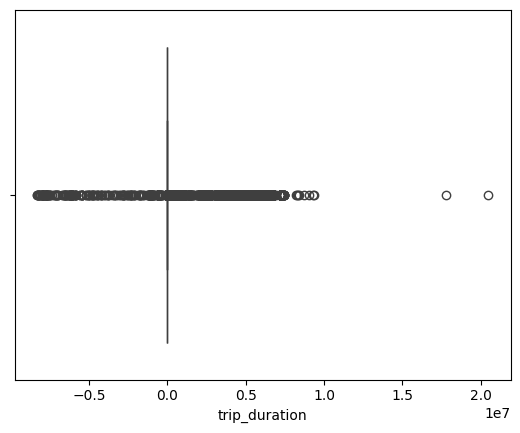

Outliers using Z-score: [   665   1368   1551 ... 534802 535747 535758]
Outliers using IQR method:
         order_id                           trip_origin  \
11        392021                   3.3007843,6.5943334   
20        392040           3.5981937,6.500608199999999   
56        392116  3.3315106205416787,6.587144320851279   
66        392138                   3.2622026,6.4488667   
201       392399                   3.2613024,6.6223452   
...          ...                                   ...   
535976   1637590           3.4734895,6.447593700000001   
535986   1637621                   3.8750262,7.4000932   
535991   1637630                   3.3299199,6.6124812   
535997   1637645                   3.3718951,6.6098316   
536003   1637666                    3.3648035,6.510129   

                   trip_destination      trip_start_time        trip_end_time  \
11      3.4238032,6.429098199999999  2021-07-01 07:11:36  2021-07-01 10:01:46   
20              3.2803826,6.4805568  2021

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming 'preprocessed_df' is your DataFrame and 'column' is the column you want to check for outliers

# Visual Inspection
# Box Plot
sns.boxplot(x=df['trip_duration'])
plt.show()

# Statistical Methods
# Z-score
z_scores = np.abs(stats.zscore(df['trip_duration']))
outliers_z = np.where(z_scores > 3)

# IQR
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['trip_duration'] < (Q1 - 1.5 * IQR)) | (df['trip_duration'] > (Q3 + 1.5 * IQR))]

# Print outlier indices
print("Outliers using Z-score:", outliers_z[0])
print("Outliers using IQR method:\n", outliers_iqr)

In [20]:
print(Q1)
print(Q3)

2023.0
4824.0


In [21]:
import numpy as np

# 1. Calculate z-scores
df['trip_duration_zscore'] = np.abs((df['trip_duration'] - df['trip_duration'].mean()) / df['trip_duration'].std())

# 2. Identify outliers using a z-score threshold
zscore_threshold = 3
outliers = df[df['trip_duration_zscore'] > zscore_threshold]
print(outliers.head().to_markdown(index=False, numalign="left", stralign="left"))

# 3. Optionally, filter out the outliers to create a new DataFrame
filtered_df = df[df['trip_duration_zscore'] <= zscore_threshold].copy()


| order_id   | trip_origin                     | trip_destination                     | trip_start_time     | trip_end_time       | day_of_week   | hour_of_day   | day_of_month   | month   | trip_start_date   | trip_end_date   | trip_duration   | trip_origin_latitude   | trip_origin_longitude   | trip_destination_latitude   | trip_destination_longitude   | is_holiday   | is_weekend   | trip_distance   | trip_duration_zscore   |
|:-----------|:--------------------------------|:-------------------------------------|:--------------------|:--------------------|:--------------|:--------------|:---------------|:--------|:------------------|:----------------|:----------------|:-----------------------|:------------------------|:----------------------------|:-----------------------------|:-------------|:-------------|:----------------|:-----------------------|
| 393193     | 3.3776289,6.545651599999999     | 3.383098,6.497595                    | 2021-10-05 11:27:22 | 2021-07-01 12:45:12 | Tues

In [22]:
len(outliers)

1652

#### Calculate the speed of the driver during the trip

In [24]:
# calculate the speed of the driver in km/h during the trip
df['driver_speed'] = (df['trip_distance'] / 1000) / (df['trip_duration'] / 3600)

In [25]:
display_df(df, 10)

| order_id   | trip_origin                        | trip_destination                | trip_start_time     | trip_end_time       | day_of_week   | hour_of_day   | day_of_month   | month   | trip_start_date   | trip_end_date   | trip_duration   | trip_origin_latitude   | trip_origin_longitude   | trip_destination_latitude   | trip_destination_longitude   | is_holiday   | is_weekend   | trip_distance   | driver_speed   |
|:-----------|:-----------------------------------|:--------------------------------|:--------------------|:--------------------|:--------------|:--------------|:---------------|:--------|:------------------|:----------------|:----------------|:-----------------------|:------------------------|:----------------------------|:-----------------------------|:-------------|:-------------|:----------------|:---------------|
| 391996     | 3.37740316890347,6.508813001668548 | 3.3450307,6.650969799999999     | 2021-07-01 07:28:04 | 2021-07-01 07:29:37 | Thursday      | 7         

In [31]:
# show the driver_distance with speeds greater than 60km/h and give the number and percentage
speed_threshold = 60
speeding_drivers = df[df['driver_speed'] > speed_threshold]
speeding_drivers_count = len(speeding_drivers)
speeding_drivers_percentage = (speeding_drivers_count / len(df)) * 100
print(speeding_drivers_count)

34826
